In [ ]:
#Importing all packages and setting some parameters for plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [1]:
#Reading the clean fuel data set
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [0]:
#Assigning clean fuel data set to a data frame
clean_fuel=pd.read_csv('Clean_Fuel.csv')

In [6]:
clean_fuel.head(5)

,Ser. No.,Date,Time,Fleet,Vehicle Number,Product,Quantity,Odo
0,26,2/8/2016,8:12:47,DPW,50,Unleaded Regular,9.2,56397
1,28,2/8/2016,8:18:22,DPW,50,Unleaded Regular,16.5,56398
2,29,2/8/2016,8:20:39,DPW,259,Unleaded Regular,3.1,8160
3,32,2/8/2016,9:07:48,DPW,249,Unleaded Regular,9.0,97751
4,33,2/8/2016,10:21:34,DPW,261,Unleaded Regular,6.6,5439


In [4]:
from google.colab import files
uploaded = files.upload()

Saving City Vehicles and Equipment.csv to City Vehicles and Equipment.csv


In [0]:
#Assigning vehicle data set to dataframe
city_vehicles=pd.read_csv("City Vehicles and Equipment.csv")

In [7]:
city_vehicles.head(5)

,Number,Year,Make,Model,Department,Description,Comments,Type,Vehicle/Equip
0,7,2006.0,Chevrolet,Trailblazer,Public Works,4WD 6 Cylinder 4.2 Liter,NaN,4WD,Vehicle
1,8,2017.0,Ford,Escape,Public Works,4wd 1.5 Litre ECOBOOST 4CYL,NaN,4WD,Vehicle
2,25,2018.0,Chevrolet,Cargo Van City Express,Public Services,City Express Cargo Van 4CYL,NaN,Animal Control Van,Vehicle
3,27,2006.0,GMC,G2500 Savana Cargo Van,Public Works,3/4 Ton Cargo Van 4.8 Liter 8 Cyl.,Building Maintenance,Cargo Van,Vehicle
4,28,2008.0,Chevrolet,G2500 Cargo Van,Public Works,3/4 Ton Cargo Van 4.8 Liter 8 Cyl.,Housekeeping,Cargo Van,Vehicle


##Data Preparation


1.   Merge the city vehicles data set with the fuel data set based on vehicle numbers and remove any vehicle information that does not correspond to the refuelling information

2.   Add Seasonality to the dataset based on the month when the refuelling was done over the years from 2016-2018. Winter is from Jan-Mar; Spring is from Apr-June; Summer is from July to Sept and Fall is from Oct-Dec

3. Create four time segments based on the time of refuelling. Morning from 07:00-12:00; Afternoon from 13:00-18:00; Evening from 19:00-00:00; Midnights from 01:00-06:00







In [0]:
#Left Joining data set here based on vehicle numbers
city_vehicle_fuel_data=pd.merge(clean_fuel,city_vehicles,how="left",left_on="Vehicle Number",right_on="Number")
#Removing all vehicle data that do not match up to the city fuel data
city_vehicle_fuel_data = city_vehicle_fuel_data[np.isfinite(city_vehicle_fuel_data['Number'])]
city_vehicle_fuel_data['Date'] = pd.to_datetime(city_vehicle_fuel_data['Date'])
city_vehicle_fuel_data['Year_Refuel'], city_vehicle_fuel_data['Month_Refuel'] = city_vehicle_fuel_data['Date'].dt.year, city_vehicle_fuel_data['Date'].dt.month
#Adding Seasonality to the Data
city_vehicle_fuel_data['Season'] = city_vehicle_fuel_data['Month_Refuel'].apply(lambda x: 'Winter' if x == 12 or x <= 3 \
else ('Spring' if x <= 6 else('Summer' if x <= 9 else 'Fall')))
city_vehicle_fuel_data['Time']=city_vehicle_fuel_data['Time'].astype('str') 
splitData = pd.DataFrame(city_vehicle_fuel_data.Time.str.split(':',2).tolist(),columns = ['hours','mins','seconds'])
splitData['hours']=splitData['hours'].astype('int64')
splitData = splitData['hours'].tolist()
city_vehicle_fuel_data['Hours']=splitData
city_vehicle_fuel_data['Time of Day'] = city_vehicle_fuel_data['Hours'].apply(lambda x: 'Midnight' if x == 0 or x <= 6 \
else ('Morning' if x <= 12 else('Afternoon' if x <= 6 else 'Evening')))

chart_one_data=city_vehicle_fuel_data[['Year_Refuel','Vehicle Number','Product']]
chart_one_data=chart_one_data.groupby(['Year_Refuel','Product']).count().reset_index()

**Chart-I:** Number of refuellings for vehicles which runs on Unleaded Regular has steadily increased from 2016 - 2018 from 700 to around 1100 vehicles which is approximately 57% increase in vehicles that runs on unleaded regular.

Do check out on the harmful effects of unleaded regular on the environment by clicking [here](https://www.eia.gov/energyexplained/index.php?page=gasoline_environment)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 0.98, 'Distribution of number of refuellings from 2016-2018 split by type of Gas')

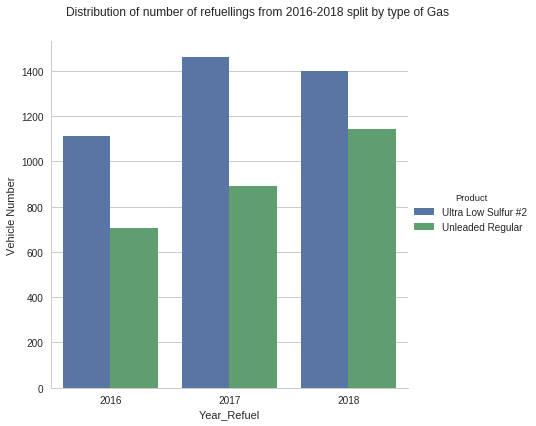

In [12]:
g=sns.factorplot(x='Year_Refuel', y='Vehicle Number', hue='Product', data=chart_one_data, kind='bar',size=6)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of number of refuellings from 2016-2018 split by type of Gas')

In [0]:
#Merging Vehicle Make and Model in the Data Frame
city_vehicle_fuel_data['Vehicle Description']=city_vehicle_fuel_data['Make']+" "+city_vehicle_fuel_data['Model']

In [0]:
#Taking only relevant columns and grouping them to get Total Quantity
dataForChart=city_vehicle_fuel_data[['Year_Refuel','Vehicle Number','Year','Vehicle Description','Product','Quantity']]
dataForChart=dataForChart.groupby(['Year_Refuel','Vehicle Number','Year','Vehicle Description','Product']).sum().reset_index()
#Subsetting Data Set according to the conditions mentioned
dataForChart2016Unleaded=dataForChart[(dataForChart['Year_Refuel']==2016)&(dataForChart['Product']=="Unleaded Regular")]
dataForChart2017Unleaded=dataForChart[(dataForChart['Year_Refuel']==2017)&(dataForChart['Product']=="Unleaded Regular")]
dataForChart2018Unleaded=dataForChart[(dataForChart['Year_Refuel']==2018)&(dataForChart['Product']=="Unleaded Regular")]
dataForChart2016UltraLow=dataForChart[(dataForChart['Year_Refuel']==2016)&(dataForChart['Product']=="Ultra Low Sulfur #2")]
dataForChart2017UltraLow=dataForChart[(dataForChart['Year_Refuel']==2017)&(dataForChart['Product']=="Ultra Low Sulfur #2")]
dataForChart2018UltraLow=dataForChart[(dataForChart['Year_Refuel']==2018)&(dataForChart['Product']=="Ultra Low Sulfur #2")]

In [0]:
#Sorting the Data Sets to get the maximum Quantity of Gas refuelled vehicle
dataForChart2016Unleaded=dataForChart2016Unleaded.sort_values(by='Quantity', ascending=False)
dataForChart2017Unleaded=dataForChart2017Unleaded.sort_values(by='Quantity', ascending=False)
dataForChart2018Unleaded=dataForChart2018Unleaded.sort_values(by='Quantity', ascending=False)
dataForChart2016UltraLow=dataForChart2016UltraLow.sort_values(by='Quantity', ascending=False)
dataForChart2017UltraLow=dataForChart2017UltraLow.sort_values(by='Quantity', ascending=False)
dataForChart2018UltraLow=dataForChart2018UltraLow.sort_values(by='Quantity', ascending=False)

#To get the final data to plot charts
FinalDataForChartUnleaded=[dataForChart2016Unleaded.head(3),dataForChart2017Unleaded.head(3),dataForChart2018Unleaded.head(3)]
resultUnleadedRegular=pd.concat(FinalDataForChartUnleaded)
resultUnleadedRegular['Vehicle Description']=resultUnleadedRegular['Vehicle Description'].astype('category')
resultUnleadedRegular['Year_Refuel']=resultUnleadedRegular['Year_Refuel'].astype('category')

**Table-1:** Majority of the vehicle models which take up lot of quantity of fuel are old. They need to be replaced soon to improve efficiency of fuel usage by the Public Works Department

In [0]:
resultUnleadedRegular

,Year_Refuel,Vehicle Number,Year,Vehicle Description,Product,Quantity
14,2016,59,2016.0,Ford F-250,Unleaded Regular,894.7
6,2016,50,2004.0,Ford F350,Unleaded Regular,792.0
8,2016,53,2009.0,Chevrolet C2500,Unleaded Regular,783.1
69,2017,59,2016.0,Ford F-250,Unleaded Regular,1246.0
63,2017,53,2009.0,Chevrolet C2500,Unleaded Regular,942.4
61,2017,50,2004.0,Ford F350,Unleaded Regular,844.0
135,2018,59,2016.0,Ford F-250,Unleaded Regular,1551.5
132,2018,56,2013.0,Ford F-250,Unleaded Regular,1039.2
125,2018,46,2002.0,Ford Pick Up F250,Unleaded Regular,830.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 0.98, 'Distribution of vehicle models across 2016 -2018 which consume maximum Unleaded Regular')

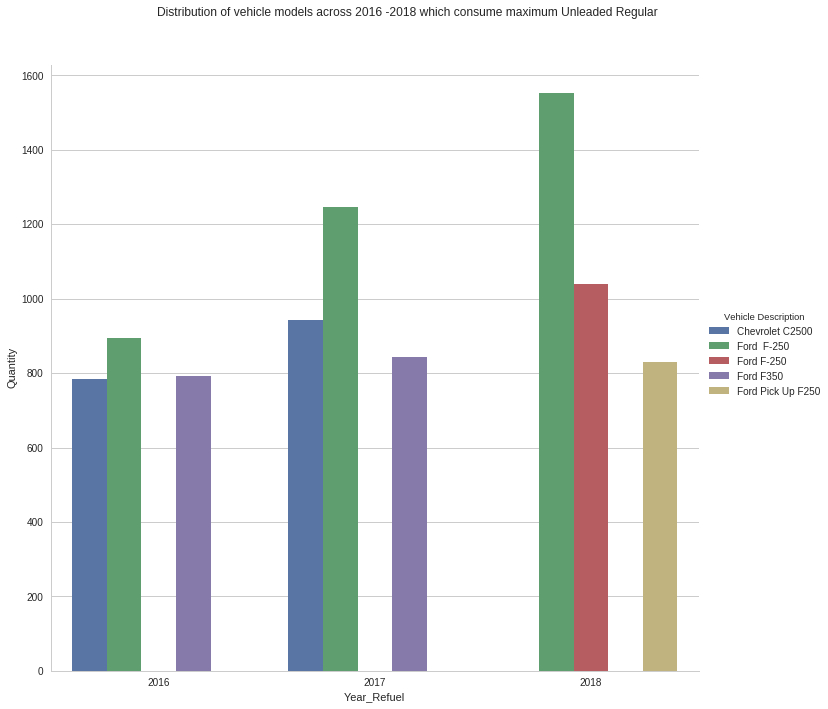

In [0]:
#Plotting Data for Chart
h=sns.factorplot(x='Year_Refuel', y='Quantity', hue='Vehicle Description', data=resultUnleadedRegular, kind='bar',size=10)
plt.subplots_adjust(top=0.9)
#plt.subplots(figsize=(20,10))
h.fig.suptitle('Distribution of vehicle models across 2016 -2018 which consume maximum Unleaded Regular')

## Plot 5: Average fuel intake in each month has increased for the majority of the cases from 2016 to 2018.

## Plot 8: Over the years from 2016-2018, there were many vehicles which refuelled in the morning and evening hours where the traffic peaks and the pollution levels are high. This could be avoided in the future citing environmental concerns


## Plot 2: The top 3 types of vehicles running on unleaded regular ranked according to their fuel consumption for 2016, 2017 and 2018. Ford F-250 has the highest fuel intake for all the years. the fuel intake for this vehicle increases from 2016 to 2018.

In [0]:
#Similarly plotting the data for Ultra Low Sulphur
FinalDataForChartUltraLow=[dataForChart2016UltraLow.head(3),dataForChart2017UltraLow.head(3),dataForChart2018UltraLow.head(3)]
resultUltraLow=pd.concat(FinalDataForChartUltraLow)
resultUltraLow['Vehicle Description']=resultUltraLow['Vehicle Description'].astype('category')
resultUltraLow['Year_Refuel']=resultUltraLow['Year_Refuel'].astype('category')
resultUltraLow

,Year_Refuel,Vehicle Number,Year,Vehicle Description,Product,Quantity
50,2016,501,2008.0,Crane Carrier LET2-52 Mcneilus 32Yd Refuse Trk.,Ultra Low Sulfur #2,4387.3
51,2016,502,2008.0,Crane Carrier LET2-52 Mcneilus 32Yd Refuse Tr...,Ultra Low Sulfur #2,3767.6
31,2016,344,2002.0,Peterbilt 320 Cummins ISM320V 320,Ultra Low Sulfur #2,2589.6
116,2017,502,2008.0,Crane Carrier LET2-52 Mcneilus 32Yd Refuse Tr...,Ultra Low Sulfur #2,4777.8
115,2017,501,2008.0,Crane Carrier LET2-52 Mcneilus 32Yd Refuse Trk.,Ultra Low Sulfur #2,4155.7
118,2017,505,2016.0,Freightliner M2/112 M2/112 Conventional Cab,Ultra Low Sulfur #2,3883.7
187,2018,502,2008.0,Crane Carrier LET2-52 Mcneilus 32Yd Refuse Tr...,Ultra Low Sulfur #2,5779.6
186,2018,501,2008.0,Crane Carrier LET2-52 Mcneilus 32Yd Refuse Trk.,Ultra Low Sulfur #2,5168.9
188,2018,504,2016.0,Freightliner M2/112 M2/112 Conventional Cab,Ultra Low Sulfur #2,3718.5


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 0.98, 'Distribution of vehicle models across 2016 -2018 which consume maximum Ultra-Low Sulphur')

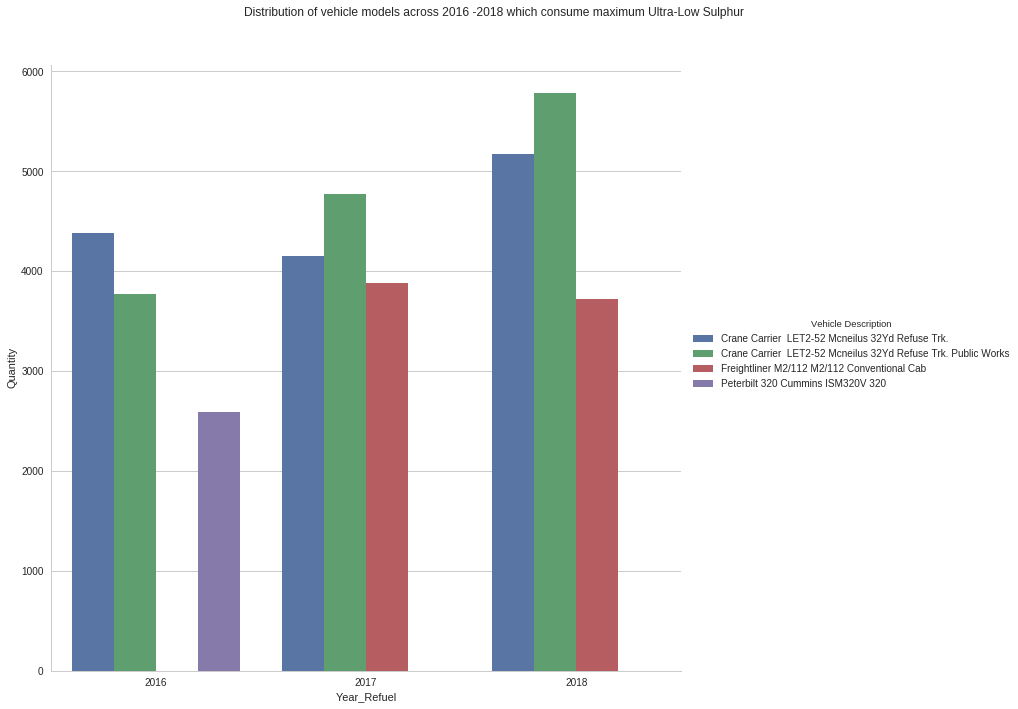

In [0]:
i=sns.factorplot(x='Year_Refuel', y='Quantity', hue='Vehicle Description', data=resultUltraLow, kind='bar',size=10)
plt.subplots_adjust(top=0.9)
#plt.subplots(figsize=(20,10))
i.fig.suptitle('Distribution of vehicle models across 2016 -2018 which consume maximum Ultra-Low Sulphur')

## Plot 3: The top 3 types of vehicles running on ultra low sulphur ranked according to their fuel consumption for 2016, 2017 and 2018. Crane Carrier has the highest fuel intake for all the years. the fuel intake for this vehicle increases from 2016 to 2018. All these vehicles are heavy machinery and that explains the huge amount in fuel intake.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Distribution of Quantity fuel with months from 2016 to 2018 ')

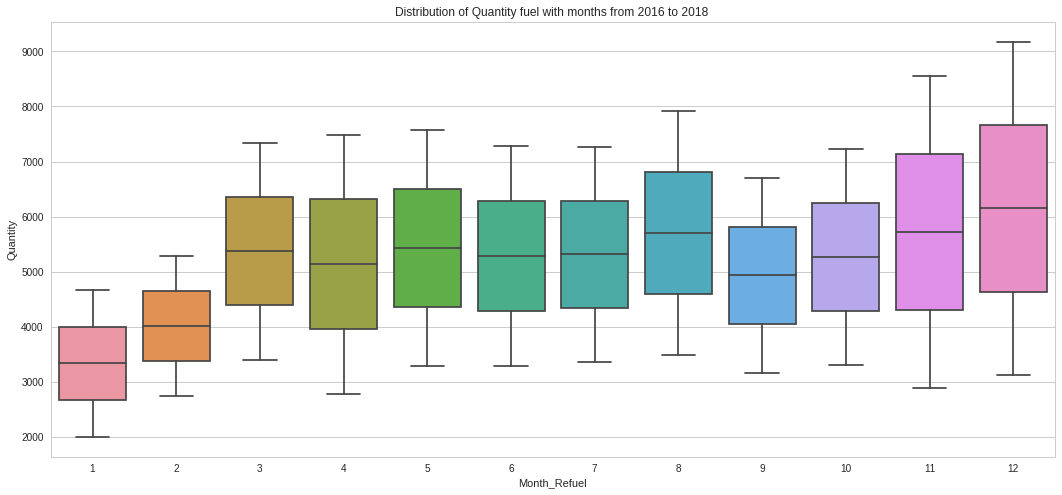

In [0]:
#Plotting Quantity across months
monthlyData=city_vehicle_fuel_data[['Month_Refuel','Product','Quantity']]
monthlyData=monthlyData.groupby(['Month_Refuel','Product']).sum().reset_index()
plt.subplots(figsize=(18,8))
sns.boxplot(x="Month_Refuel", y="Quantity",data=monthlyData)
plt.title('Distribution of Quantity fuel with months from 2016 to 2018 ')

## Plot 4: The average intake of fuel is maximum during the commencement of winter season.

Text(0.5, 1.0, 'Heatmap of Quantity fuelling done across months and years from 2016-2018')

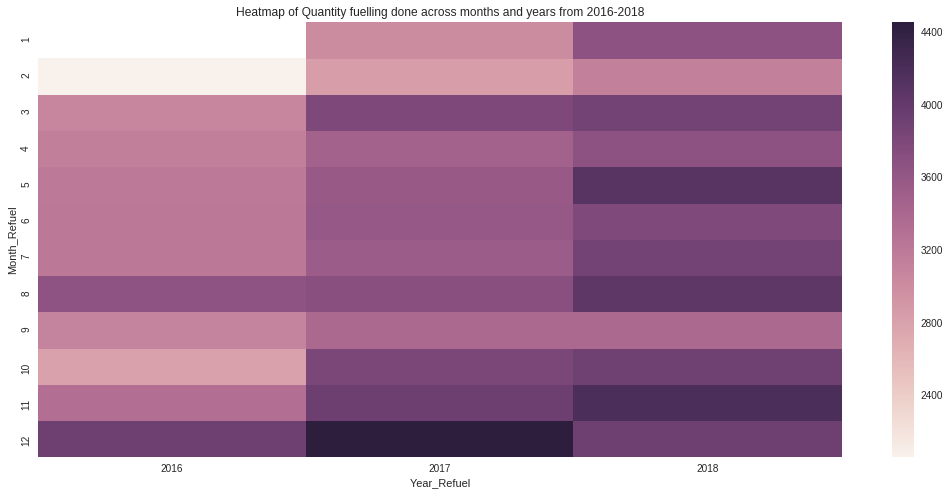

In [0]:
monthlyYearData=city_vehicle_fuel_data[['Year_Refuel','Month_Refuel','Quantity']]
monthlyYearData=monthlyYearData.groupby(['Year_Refuel','Month_Refuel']).sum().reset_index()
heatMapPlot = monthlyYearData.pivot_table(values='Quantity',index='Month_Refuel',columns='Year_Refuel')
plt.subplots(figsize=(18,8))
sns.heatmap(heatMapPlot)
plt.title('Heatmap of Quantity fuelling done across months and years from 2016-2018')

Text(0.5, 1.0, 'Heatmap of Quantity fuelling done across months and make of vehicle from 2016-2018')

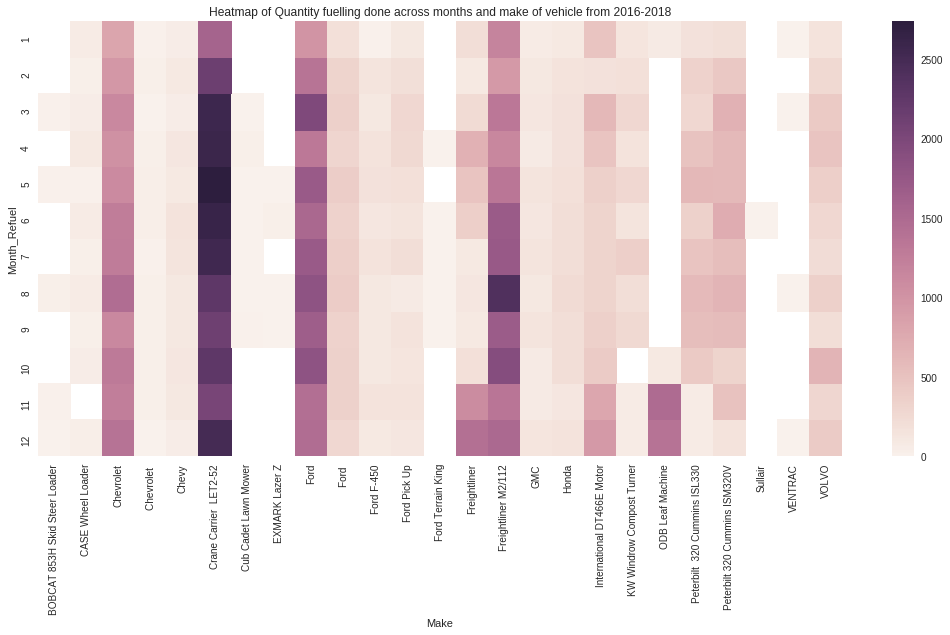

In [0]:
monthlyMakeData=city_vehicle_fuel_data[['Month_Refuel','Make','Quantity']]
monthlyMakeData=monthlyMakeData.groupby(['Month_Refuel','Make']).sum().reset_index()
heatMapPlot = monthlyMakeData.pivot_table(values='Quantity',index='Month_Refuel',columns='Make')
plt.subplots(figsize=(18,8))
sns.heatmap(heatMapPlot)
plt.title('Heatmap of Quantity fuelling done across months and make of vehicle from 2016-2018')

## Plot 6: During the fall season, there was a lot of leaf removal machines used and in the winter season from the months of January and February, there was an increased use of snow removal vehicles.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 0.98, 'Distribution of Quantity refuellings from 2016-2018 split by type of Gas and Seasons, Winter:Jan-Mar;Spring:Apr-Jun;Summer:July-Sept;Fall:Oct-Dec')

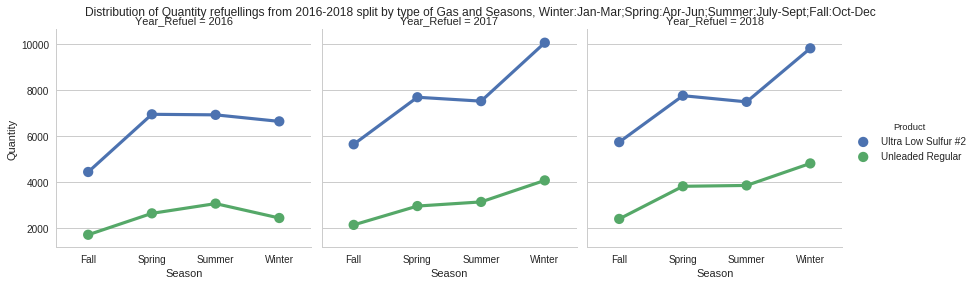

In [0]:
dataForBoxPlot=city_vehicle_fuel_data[['Year_Refuel','Season','Product','Quantity']]
dataForBoxPlot=dataForBoxPlot.groupby(['Year_Refuel','Season','Product']).sum().reset_index()
m=sns.factorplot(x = "Season", y = "Quantity", hue = "Product", col="Year_Refuel",data = dataForBoxPlot);
plt.subplots_adjust(top=0.9)
#plt.subplots(figsize=(20,10))
m.fig.suptitle('Distribution of Quantity refuellings from 2016-2018 split by type of Gas and Seasons, Winter:Jan-Mar;Spring:Apr-Jun;Summer:July-Sept;Fall:Oct-Dec')

## Plot 7: During the end of fall, we detect an increase in the usage of leaf machines. There has been a high demand for fuel during November and December which could be explained by the use of snow removal vehicles. However, an anomaly in this pattern is during 2016. This could be attributed to the increased fuel prices during winter 2016. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 0.98, 'Distribution of Quantity refuellings from 2016-2018 split by type of Gas and Time of Day, Midnights:01:00-06:00, Mornings:07:00-12:00,Afternoons:13:00-18:00, Evenings:19:00-00:00')

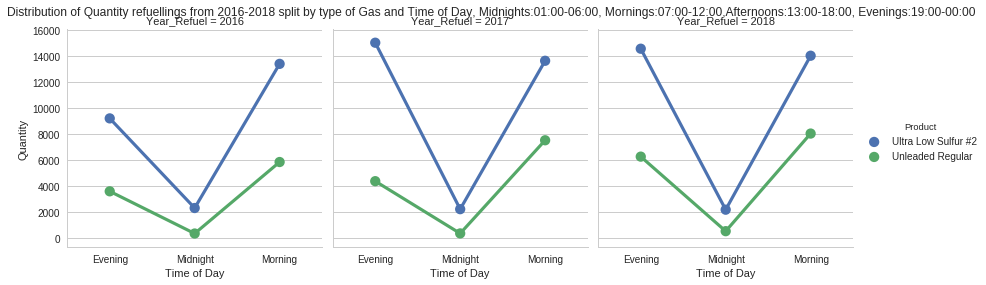

In [0]:
dataForTimePlot=city_vehicle_fuel_data[['Year_Refuel','Time of Day','Product','Quantity']]
dataForTimePlot=dataForTimePlot.groupby(['Year_Refuel','Time of Day','Product']).sum().reset_index()
q=sns.factorplot(x = "Time of Day", y = "Quantity", hue = "Product", col="Year_Refuel",data = dataForTimePlot);
plt.subplots_adjust(top=0.9)
#plt.subplots(figsize=(20,10))
q.fig.suptitle('Distribution of Quantity refuellings from 2016-2018 split by type of Gas and Time of Day, Midnights:01:00-06:00, Mornings:07:00-12:00,Afternoons:13:00-18:00, Evenings:19:00-00:00')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 0.98, 'Distribution of Quantity refuellings from 2016-2018 in code orange days')

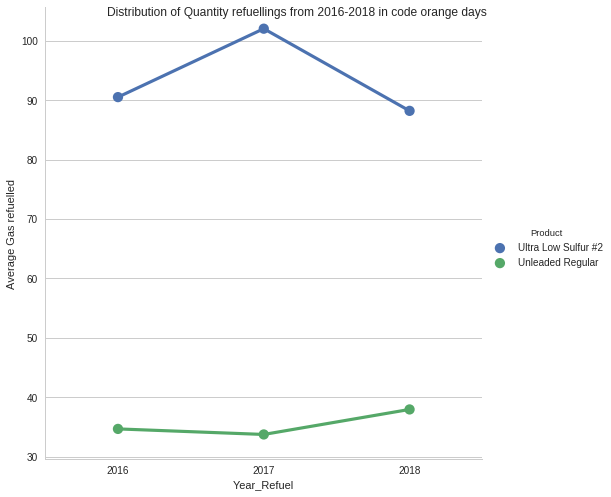

In [0]:
#code orange days
dataForCodeOrange=city_vehicle_fuel_data[['Date','Product','Quantity']]
dataForCodeOrange=dataForCodeOrange.groupby(['Date','Product']).sum().reset_index()
CodeOrangeDays = ["2016-07-26","2016-04-19","2016-05-26","2016-05-25","2016-07-22","2016-09-23","2016-07-21",
                 "2017-04-11","2017-05-18","2017-06-13","2017-06-12","2017-05-17","2017-07-20",
                 "2018-07-03","2018-05-02","2018-07-10","2018-08-10","2018-06-30","2018-07-10","2018-06-18"]
dataForCodeOrange=dataForCodeOrange.loc[dataForCodeOrange['Date'].isin(CodeOrangeDays)]
dataForCodeOrange['Year_Refuel']= dataForCodeOrange['Date'].dt.year
dataForCodeOrange=dataForCodeOrange[['Year_Refuel','Product','Quantity']]
dataForCodeOrange=dataForCodeOrange.groupby(['Year_Refuel','Product']).sum().reset_index()
OrangeDays=[8,8,6,6,7,7]
dataForCodeOrange['Number of Code Orange Days']=OrangeDays
dataForCodeOrange["Average Gas refuelled"]=dataForCodeOrange["Quantity"]/dataForCodeOrange['Number of Code Orange Days']
n=sns.factorplot(x='Year_Refuel', y='Average Gas refuelled', hue='Product', data=dataForCodeOrange,size=7)
n.fig.suptitle('Distribution of Quantity refuellings from 2016-2018 in code orange days')

## Plot 9: On calculating the average fuel refilled during the code orange days, we can observe that it has not declined over the years for unleaded regular. This can be perceived as a lack of awareness about the impact of refuelling on a code orange day.

## Top four Suggestions: 
Spread/increase awareness among the personnel to not refuel during the code orange days as the emissions for fuel fill-ups contribute to air pollution. 
Spread/increase awareness among the personnel to not refuel during the morning and evening hours as the emissions for fuel fill-ups contribute to air pollution.
Investigate the increased use of overall fuel consumption. 
Many vehicles in the fleet are models that were built before 2005. The department should consider replacing them with fuel and performance efficient newer models.
